<a href="https://colab.research.google.com/github/Alejix/DataScience/blob/main/Tecnicas_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparación de los datos

Metodología: ASUM-DM

1. Describir - BI
2. Reducir - Aprendizaje no supervisado
3. Agrupar - Aprendizaje no supervisado
4. Clasificar - Aprendizaje supervisado
5. Pronostica - Aprendizaje supervisado

Etapas de entendimiento:
Comprensión del negocio: Definir el problema, los objetivos, y los requisitos de la solución empresarial.
Enfoque analítico: Expresar el problema bajo el contexto de la estadística y la IA. Definir el método de construcción.

Etapas de preparación:
Requisitos de datos: Determinar los contenidos de datos, formatos y representaciones. Definir de manera clara el insumo de datos.
Recopilación de datos: Reunir los recursos relevantes para la solución del problema. Definir los mecanismos para capturar dichos insumos.
Comprensión de datos: Conocer el estado actual del insumo. Implementa herramientas estadísticas descriptivas para descubrir los elementos iniciales de los datos.

Etapas de ejecución:
Preparación de datos: Construir el conjunto de datos para el modelo. Implementar mecanismos para mejorar la capacidad predictora de las variables.
Modelado: Identificar la mejor técnica de modelado. Determinar un esquema de desempeño para decidir el mejor método aplicado.
Evaluación: Buscar interpretar la calidad del componente entregado bajo mecanismos gráficos y numéricos.

Etapas de cierre:
Implementación: Implementar el modelo en ambientes de producción.
Retroalimentación: Determinar la efectividad futura del modelo y sus posibles modificaciones en soporte.


# Etapa de entendimiento

## Comprensión del negocio

Una clínica de ginecobstetricia, que cuentan con la información de 2.126 histogramas de fetos, nos solicita construir un modelo de clasificación que sea capaz de determinar si un feto es normal, sospechoso o cuenta con alguna patología cardiaca. El modelo debería contar con un desempeño superior al 85% en accuracy y con la mejor matriz de confusión y f1 score posible.

## Enfoque analítico

Para abordar este problema, aplicaremos técnicas de preparación de datos que incluyen submuestreo o remuestreo, eliminación de datos atípicos, entre otros. Estos pasos son fundamentales para garantizar la calidad y la integridad de nuestros datos, lo que es esencial para el éxito de nuestro modelo.

Una vez que tengamos nuestros datos preparados, procederemos a la construcción de modelos de clasificación utilizando técnicas avanzadas de inteligencia artificial. Estos modelos serán entrenados y evaluados meticulosamente para garantizar un rendimiento excepcional. Nuestro objetivo es lograr un nivel de precisión (accuracy) superior al 85%, lo que asegurará que nuestras predicciones sean confiables.

Para identificar el modelo óptimo, utilizaremos la validación cruzada y la búsqueda exhaustiva de hiperparámetros. Los modelos que evaluaremos incluirán la Regresión Logística, Máquina de Soporte Vectorial (SVM), K Vecinos Más Cercanos (KNN), Árbol de Decisión y Random Forest. Exploraremos una variedad de configuraciones de hiperparámetros para cada modelo con el objetivo de encontrar la combinación que maximice la precisión y el F1 Score, así como la mejor matriz de confusión.

# Etapa de preparación

## Requisitos de datos

Nuestro insumo de datos, que proviene de un archivo .csv, se verá representado por las siguientes variables:


baseline: Tasa cardiaca base fetal
accelerations: Número de aceleraciones por segundo
fetal_movement: Número de movimientos fetales por segundo
uterine_contractions: Número de contracciones del útero por segundo
light_decelerations: Número de desaceleraciones leves por segundo
severe_decelerations: Número de desaceleraciones fuertes por segundo
prolongued_decelerations: Número de desaceleraciones profundas por segundo
abnormal_short_term_variability: Porcentaje del tiempo con variabilidad anormal de corto plazo
mean_value_of_short_term_variability: Promedio de la variabilidad de corto plazo
percentage_of_time_with_abnormal_long_term_variability: Porcentaje del tiempo con variabilidad anormal de largo plazo
mean_value_of_long_term_variability: Promedio de la variabilidad de largo plazo
histogram_width: Rango del electrocardiograma
histogram_min: Mínimo del electrocardiograma
histogram_max: Máximo del electrocardiograma
histogram_number_of_peaks: Número de picos del electrocardiograma
histogram_number_of_zeroes: Número de ceros del electrocardiograma
histogram_mode: Moda del electrocardiograma
histogram_mean: Media del electrocardiograma
histogram_median: Mediana del electrocardiograma
histogram_variance: Varianza del electrocardiograma
histogram_tendency: Tendencia del electrocardiograma
fetal_health: Estado de salud fetal:
   1: Normal
   2: Sospechoso
   3: Patológico


## Comprensión de los datos

In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### Librerías

In [ ]:
#Tratamiento de datos
import numpy as np
import pandas as pd
import math

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Preparación de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

#Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Busqueda de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluación
from sklearn.metrics import accuracy_score #Es bueno si tiende a 1.
from sklearn.metrics import confusion_matrix #Matriz de confusión donde la diagonal nos muestra los falsos positivos y los falsos negativos
from sklearn.metrics import recall_score #Es bueno si tiende a 1.
from sklearn.metrics import precision_score #Es bueno si tiende a 1. Capacidad del modelo para hacer predicciones validas.
from sklearn.metrics import f1_score #Es bueno si tiende a 1.

#Advertencias
import warnings
warnings.filterwarnings('ignore')

Definimos una semilla para no generar nuevos resultados en cada iteración del notebook.

In [ ]:
np.random.seed(12)

### Carga de datos

In [ ]:
data = pd.read_csv('caso2_fetal.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Obtener una lista de todas las columnas numéricas
columnas_numericas = data.select_dtypes(include=['float64']).columns

# Calcular la cantidad de valores únicos en cada columna numérica
valores_unicos_por_columna = data[columnas_numericas].nunique()

# Mostrar la cantidad de valores únicos en cada columna
print(valores_unicos_por_columna)

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

Se puede observar que:

- todas las variables son de tipo float64 inicialmente

- No existen datos nulos a simple vista

In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
# Se seleccionan solo las variable numéricas
numerical = data.select_dtypes(include=['float64']).columns

# Se crea una lista con las posibles coordenadas para generar las gráficas
cords = [[0,0],[0,1],[1,0],[1,1]]
cords2 = [[0,0],[0,1],[0,2],[0,3],[0,4],[1,0],[1,1],[1,2],[1,3],[1,4],[2,0],[2,1],[2,2],[2,3],[2,4],[3,0],[3,1],[3,2],[3,3],[3,4],[4,0],[4,1],[4,2],[4,3],[4,4],[5,0],[5,1],[5,2],[5,3],[5,4]]

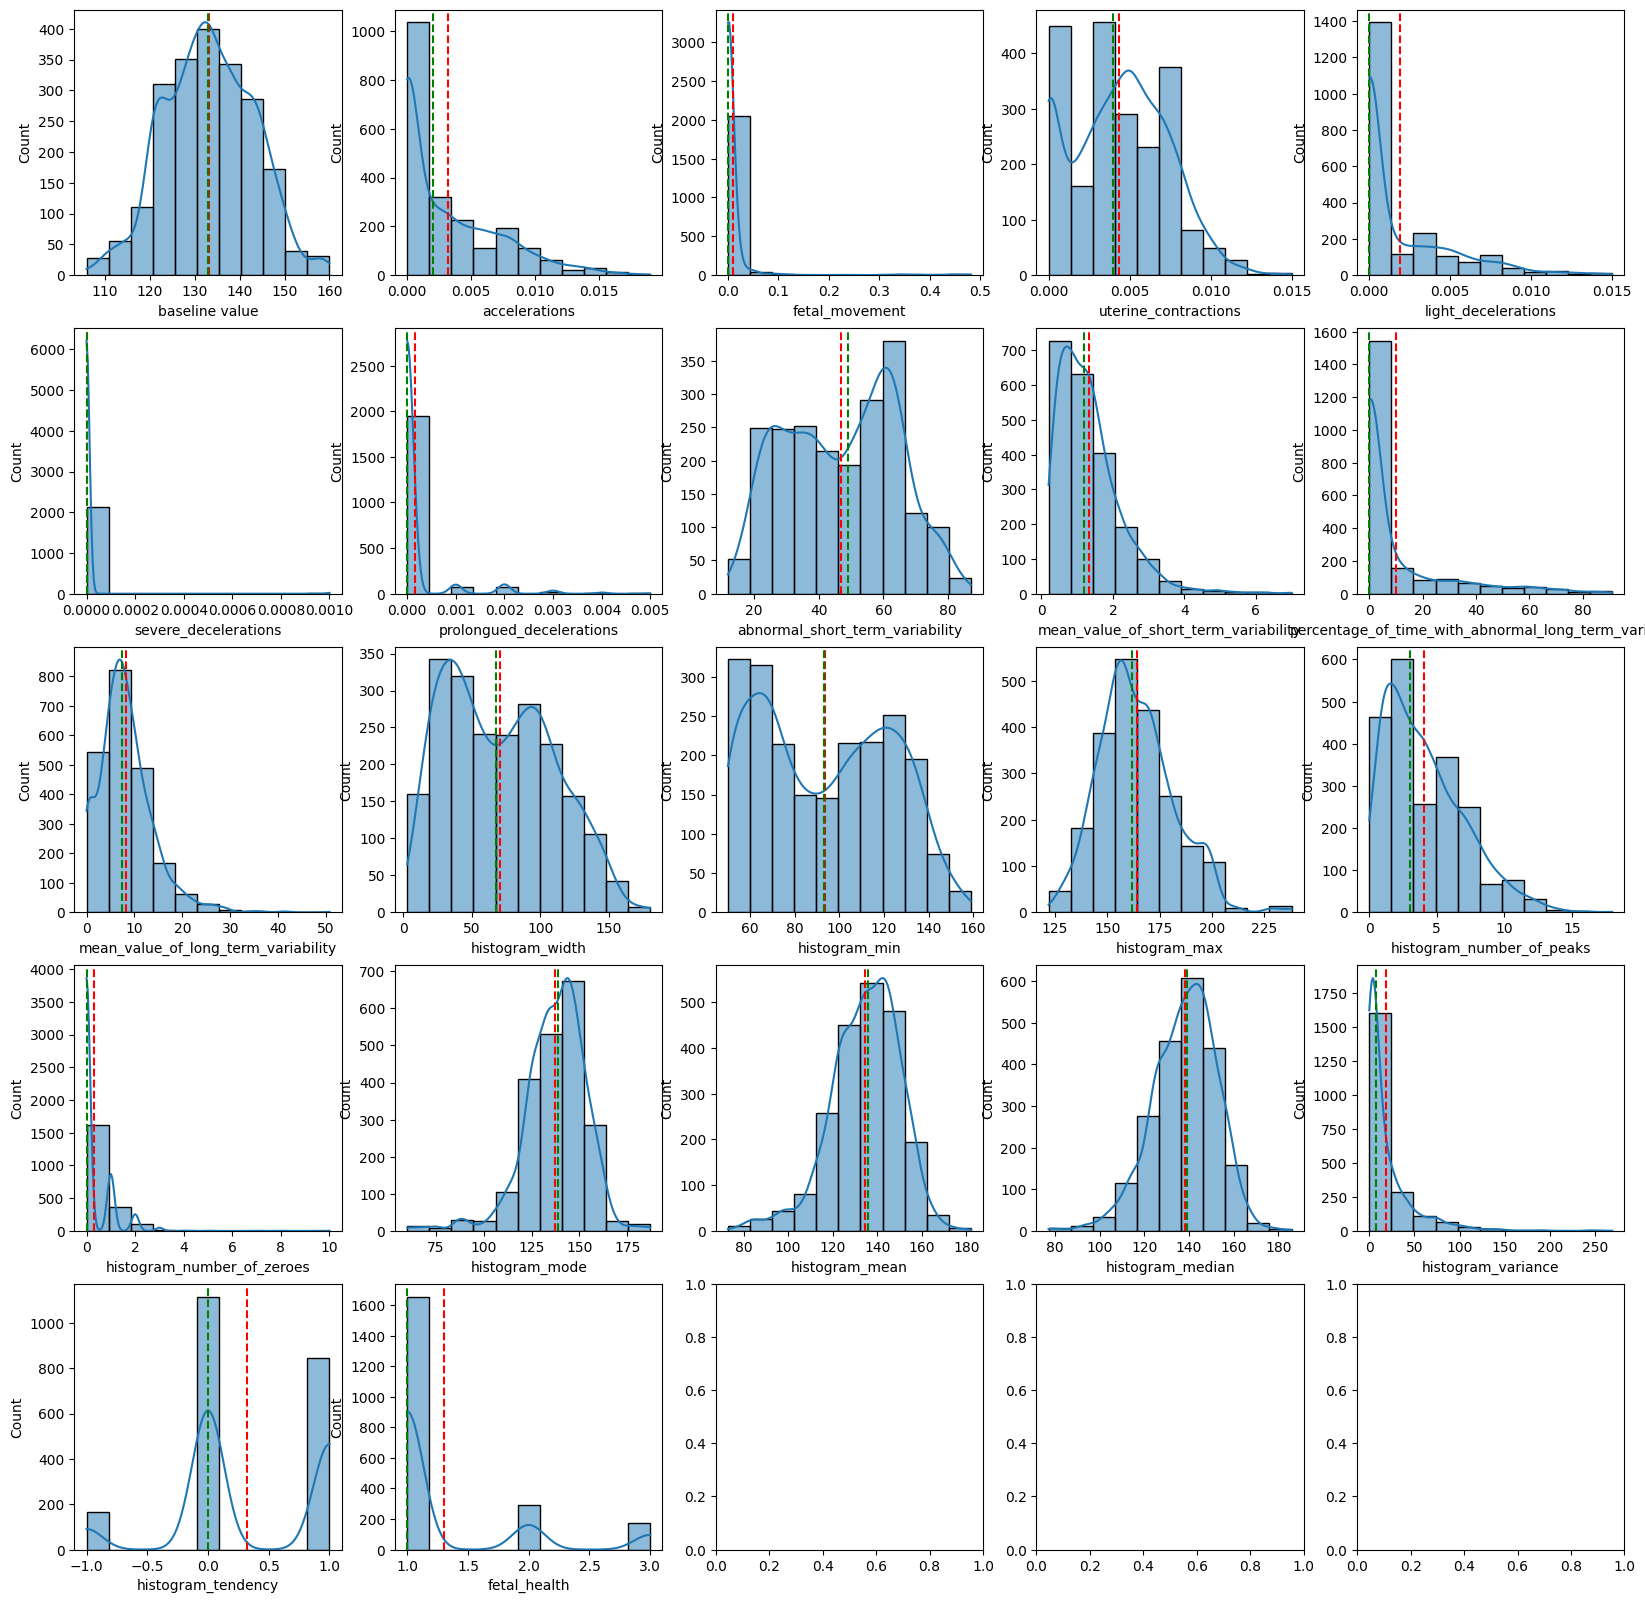

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(len(numerical)):
    sb.histplot(data=data, x=numerical[i], kde=True,bins = int(1+3.3*math.log10(len(data))), ax=ax[cords2[i][0],cords2[i][1]] )#Fórmula de Sturges: Me determina la cantidad de barras correcta dependiendo de mi cantidad de datos.
    ax[cords2[i][0], cords2[i][1]].axvline(x=data[numerical[i]].mean(), color='red', linestyle='dashed')
    ax[cords2[i][0], cords2[i][1]].axvline(x=data[numerical[i]].median(), color='green', linestyle='dashed')
plt.show()

Podemos observar que las variables histogram_tendency y fetal_health tienen valores discretos y se deben convertir en categóricas.

Decidimos volver a plotear las variables severe_decelerations, fetal_movement, prolongued_decelerations y histogram_number_of_zeroes con un menor rango, esto con el fin de poder visualizar mejor su comportamiento.

In [ ]:
numerical_selected = ['severe_decelerations', 'fetal_movement', 'prolongued_decelerations', 'histogram_number_of_zeroes']

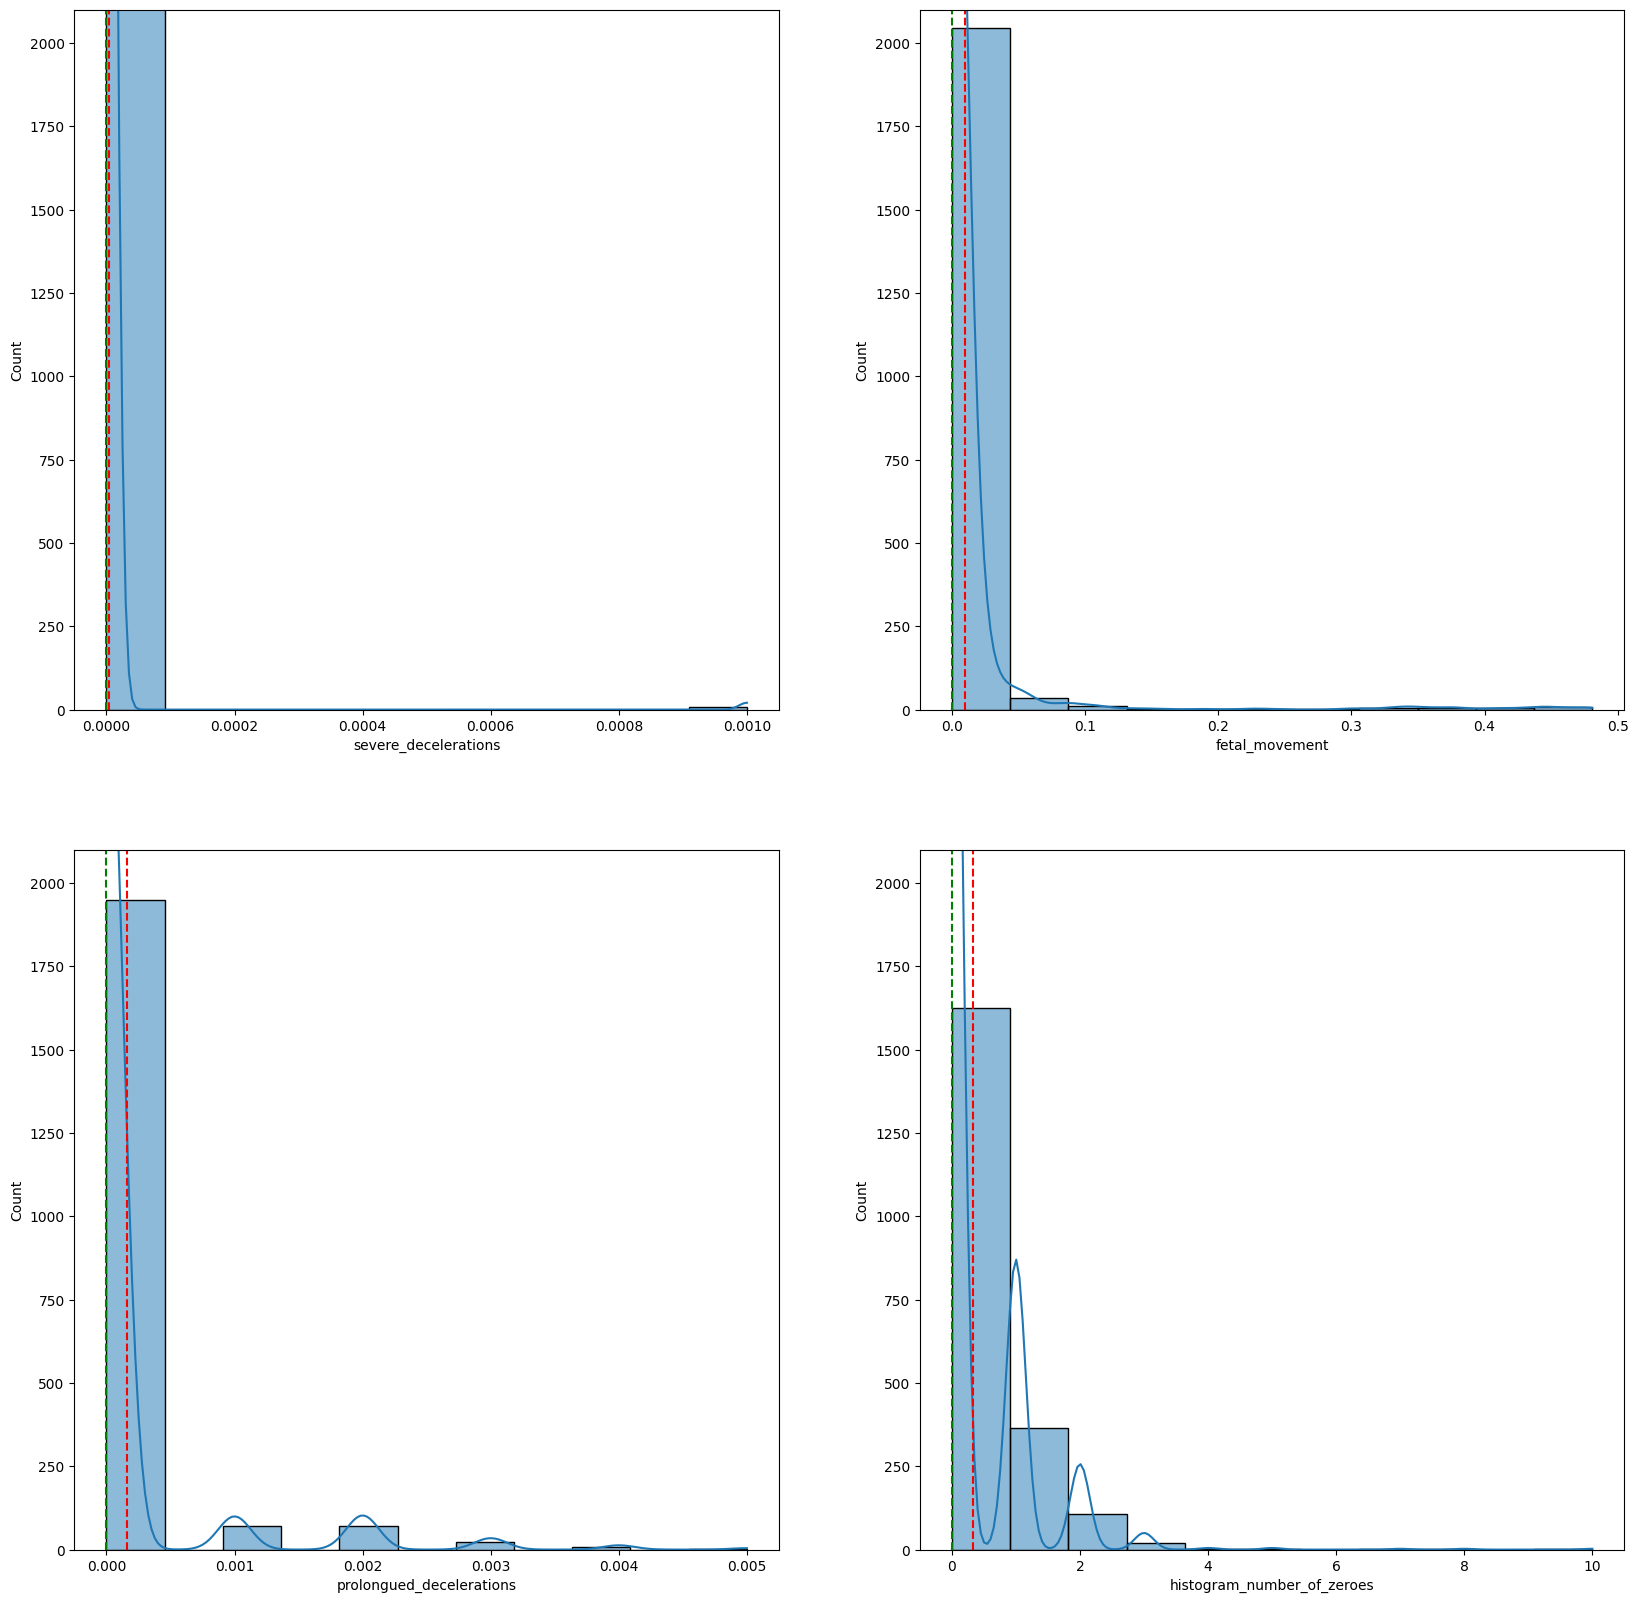

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for i in range(len(numerical_selected)):
    sb.histplot(data=data, x=numerical_selected[i], kde=True,bins = int(1+3.3*math.log10(len(data))), ax=ax[cords[i][0],cords[i][1]] )#Fórmula de Sturges: Me determina la cantidad de barras correcta dependiendo de mi cantidad de datos.
    ax[cords[i][0], cords[i][1]].set_ylim(0, 2100)
    ax[cords[i][0], cords[i][1]].axvline(x=data[numerical_selected[i]].mean(), color='red', linestyle='dashed')
    ax[cords[i][0], cords[i][1]].axvline(x=data[numerical_selected[i]].median(), color='green', linestyle='dashed')
plt.show()


Como se puede observar en los gráficos anteriores, y en la información de los value_counts, la variable severe_decelerations solo tiene 2 posibles valores, y junto con la variable fetal_movement tienen un desbalance enorme, por lo que decidimos no utilizarlas en nuestro modelado.

Convertimos las variables a categóricas para plotearlas:

In [ ]:
data['histogram_tendency'] = data['histogram_tendency'].astype('str')
data['fetal_health'] = data['fetal_health'].astype('str')

Eliminamos las variables severe_decelerations y fetal_movement

In [ ]:
data.drop(['severe_decelerations', 'fetal_movement'], axis=1, inplace=True)

In [ ]:
tortas = ['histogram_tendency', 'fetal_health']

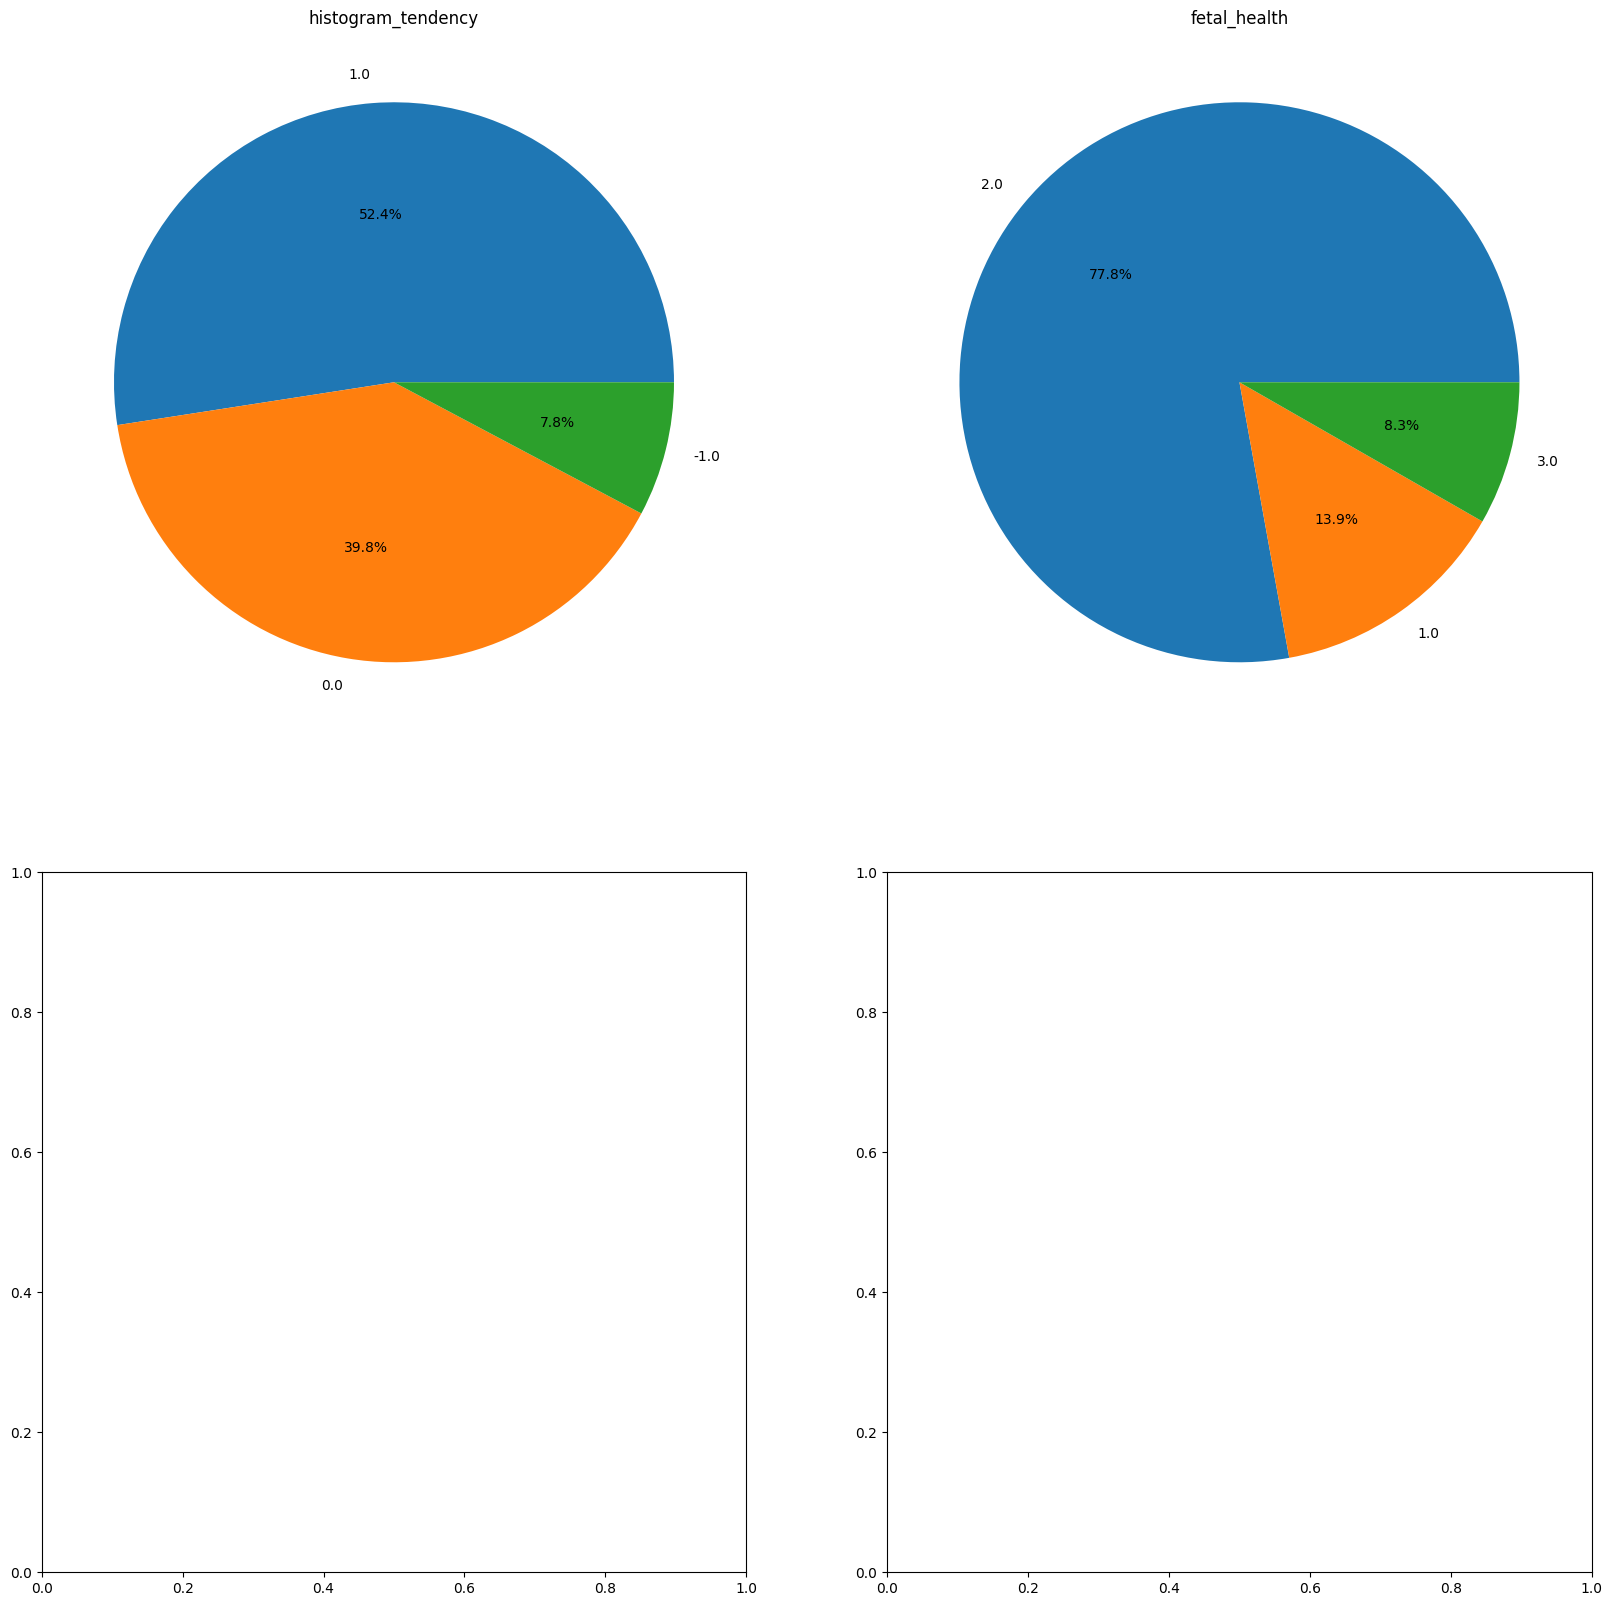

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for i in range (len(tortas)):
    ax[cords[i][0],cords[i][1]].pie(data[tortas[i]].value_counts(), labels=data[tortas[i]].unique(), autopct='%0.1f%%')
    ax[cords[i][0],cords[i][1]].set_title(tortas[i])
plt.show()

Podemos observar un desbalance en nuestra variable problema, que es fetal health, por lo que se decide realizar sampling para igualar las proporciones.

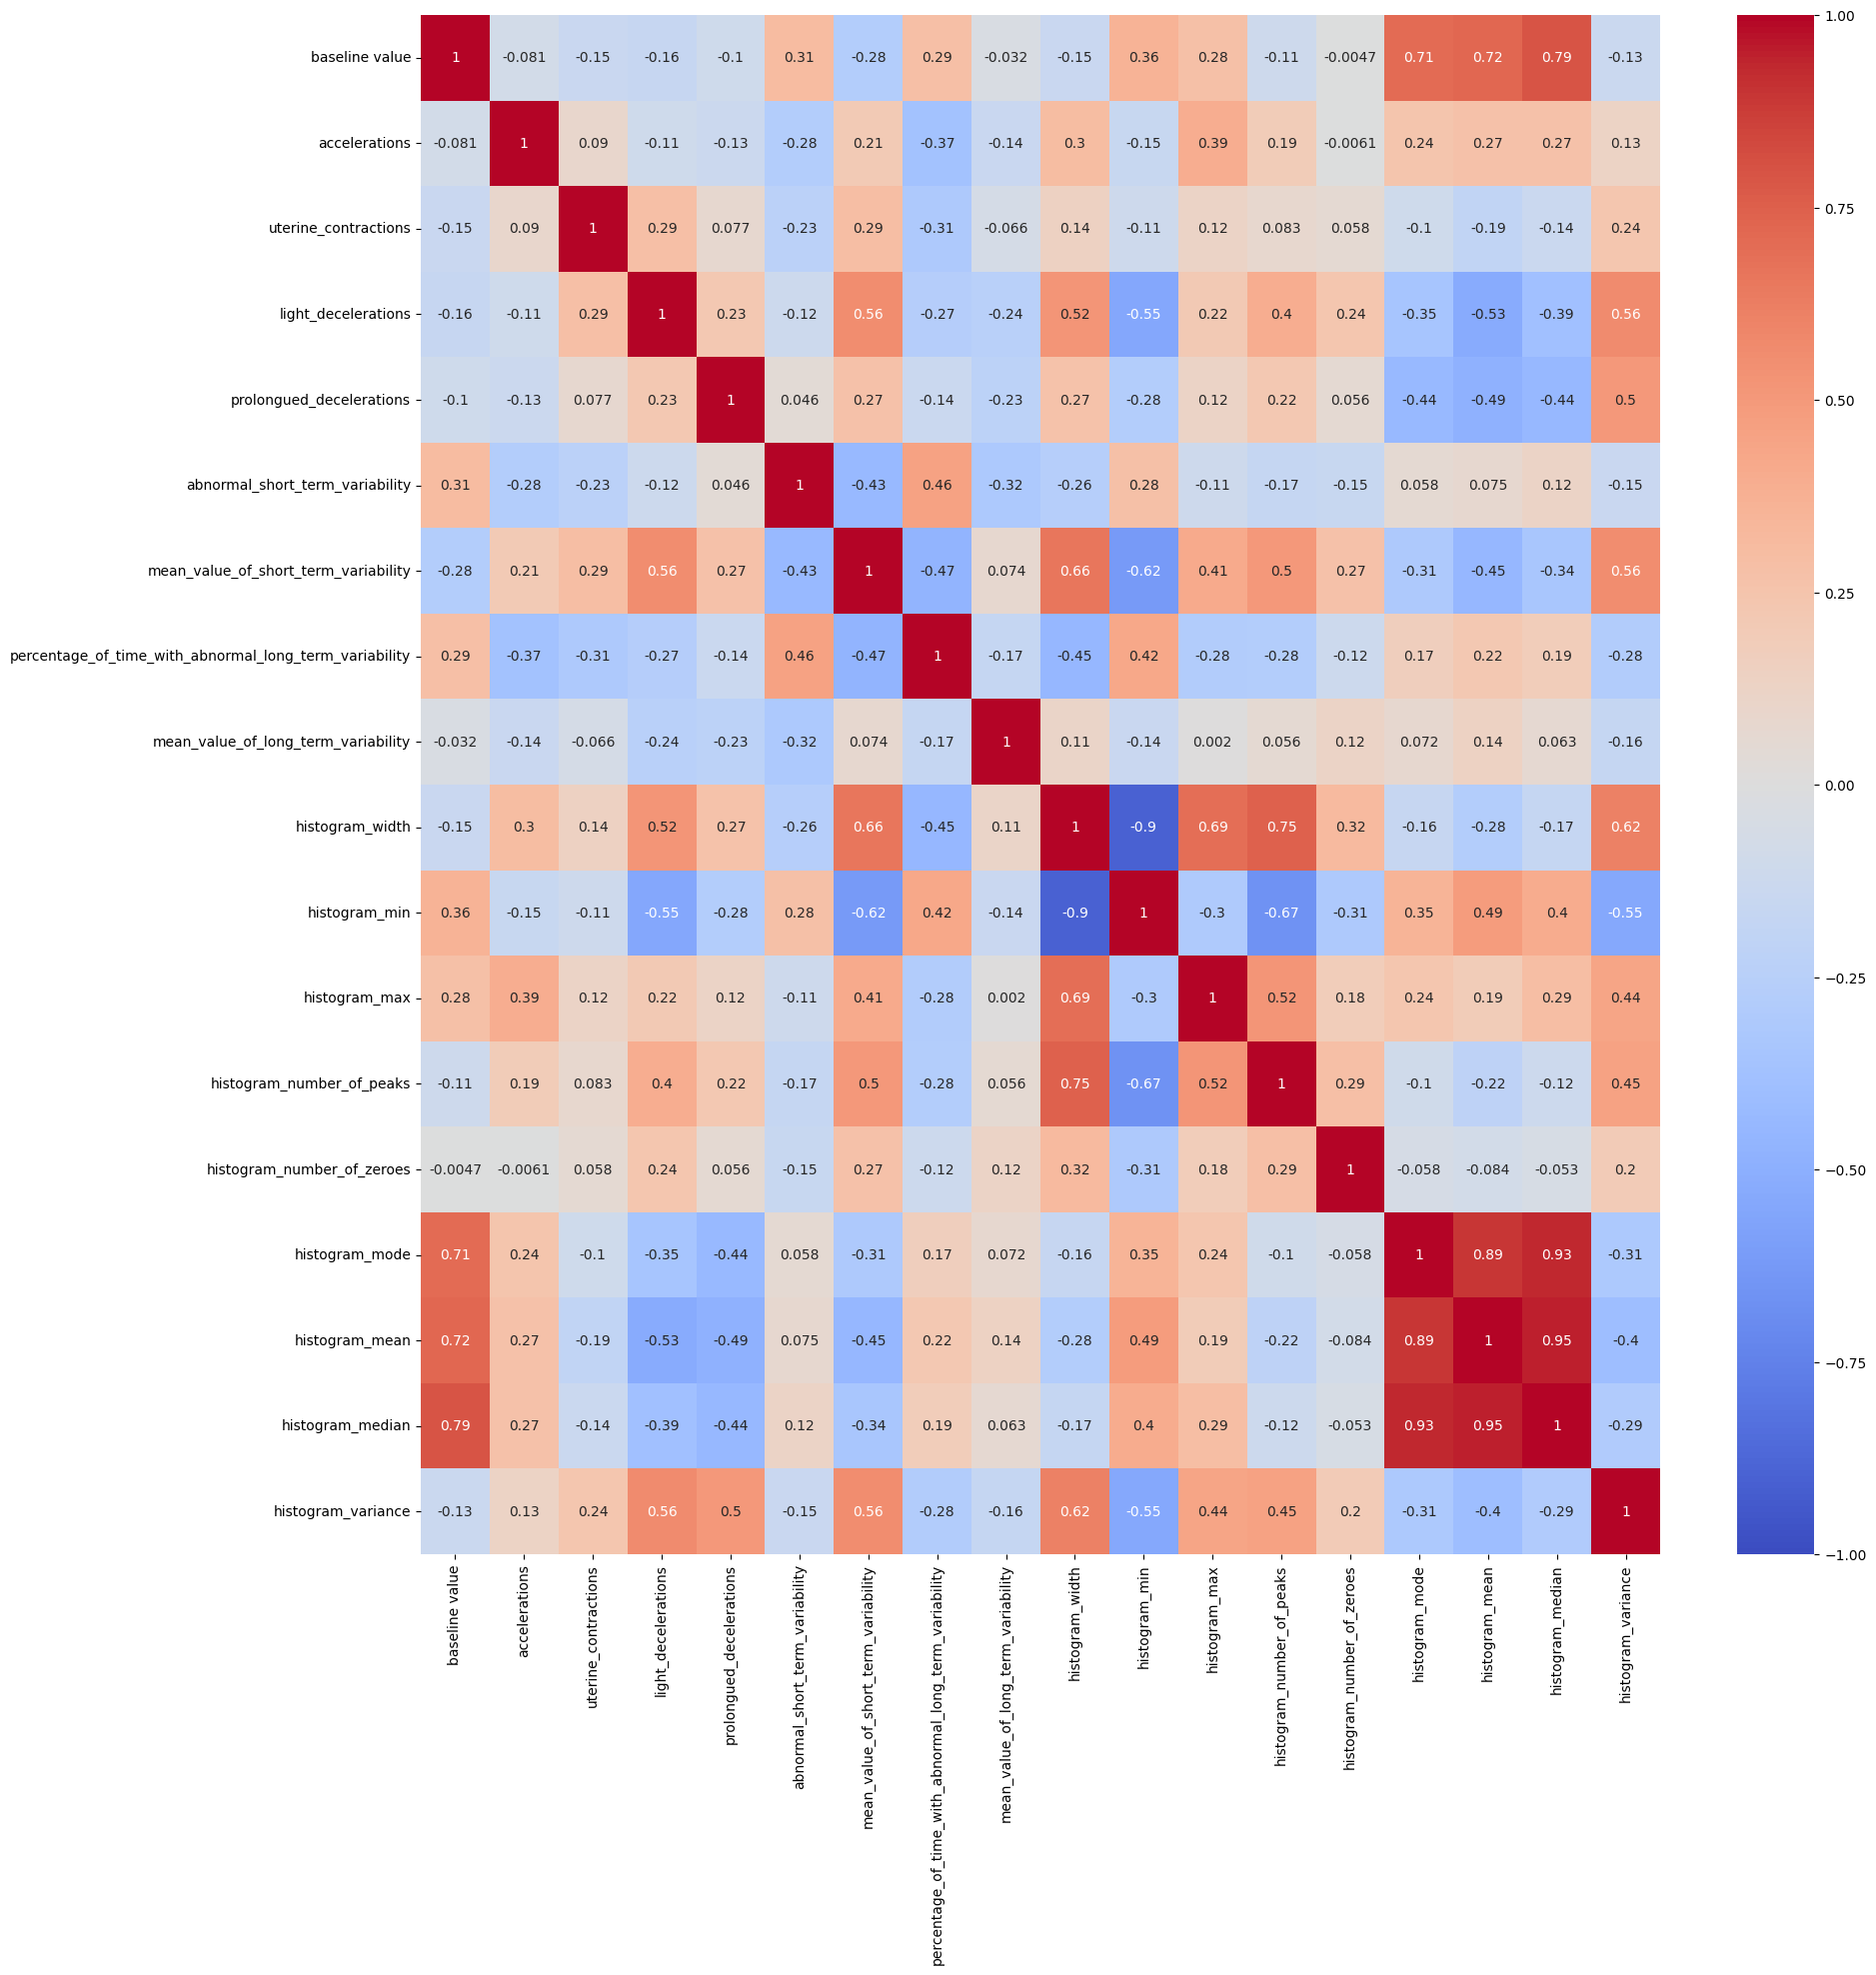

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(data = data.corr(), center = 0,
           vmax=1, vmin=-1, annot=True, cmap = 'coolwarm')
plt.show()

# Etapa de ejecución

## Preparación de los datos:

### Remuestreo o submuestreo

In [ ]:
#Generar un df por el estado de salud fetal
data_Normal = data[data['fetal_health'] == '1.0']
print(f'La cantidad de datos con estado normal es: {data_Normal.shape[0]}')

data_Sospechoso = data[data['fetal_health'] == '2.0']
print(f'La cantidad de datos con estado sospechoso es: {data_Sospechoso.shape[0]}')

data_Patologico = data[data['fetal_health'] == '3.0']
print(f'La cantidad de datos con estado patológico es: {data_Patologico.shape[0]}')

print(f"La cantidad de datos en caso de Submuestreo sería: {3*min(data_Patologico.shape[0],data_Sospechoso.shape[0],data_Normal.shape[0])}")
print(f"La cantidad de datos en caso de Remuestreo sería: {3*max(data_Patologico.shape[0],data_Sospechoso.shape[0],data_Normal.shape[0])}")


La cantidad de datos con estado normal es: 1655
La cantidad de datos con estado sospechoso es: 295
La cantidad de datos con estado patológico es: 176
La cantidad de datos en caso de Submuestreo sería: 528
La cantidad de datos en caso de Remuestreo sería: 4965


Debido a la cantidad de datos que hay de datos con estado patológico se decide hacer un remuestreo en vez de un submuestreo.

In [ ]:
#Remuestreo
data_Sospechoso_re = data_Sospechoso.sample(data_Normal.shape[0], replace = True)
data_Sospechoso_re.shape

(1655, 20)

In [ ]:
#Remuestreo
data_Patologico_re = data_Patologico.sample(data_Normal.shape[0], replace = True)
data_Patologico_re.shape

(1655, 20)

In [ ]:
datos_re = pd.concat([data_Normal, data_Patologico_re,data_Sospechoso_re])
datos_re.shape

(4965, 20)

In [ ]:
datos_re = datos_re.reset_index(drop = True)
datos_re

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132.0,0.006,0.006,0.003,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
1,133.0,0.003,0.008,0.003,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
2,134.0,0.003,0.008,0.003,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
3,132.0,0.007,0.008,0.000,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
4,131.0,0.005,0.008,0.003,0.0,28.0,1.4,0.0,12.9,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,141.0,0.001,0.001,0.001,0.0,56.0,0.5,17.0,7.4,51.0,121.0,172.0,4.0,0.0,154.0,148.0,152.0,7.0,0.0,2.0
4961,130.0,0.000,0.006,0.000,0.0,67.0,0.5,22.0,14.3,84.0,72.0,156.0,12.0,0.0,143.0,140.0,143.0,4.0,1.0,2.0
4962,141.0,0.000,0.002,0.000,0.0,78.0,0.2,49.0,4.8,10.0,136.0,146.0,1.0,0.0,142.0,141.0,143.0,0.0,0.0,2.0
4963,151.0,0.000,0.006,0.006,0.0,64.0,1.1,26.0,3.0,150.0,50.0,200.0,11.0,2.0,156.0,150.0,156.0,38.0,1.0,2.0


In [ ]:
datos_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   uterine_contractions                                    4965 non-null   float64
 3   light_decelerations                                     4965 non-null   float64
 4   prolongued_decelerations                                4965 non-null   float64
 5   abnormal_short_term_variability                         4965 non-null   float64
 6   mean_value_of_short_term_variability                    4965 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  4965 non-null   float64
 8   mean_value_of_long_term_variability   

In [ ]:
datos_re.describe()

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000
mean,135.121249,0.001546,0.003675,0.002025,0.000456,56.283988,1.220040,19.047331,6.825780,67.145619,95.845519,162.991138,4.001410,0.311581,133.221148,130.876133,134.983283,24.566365
std,10.139270,0.002972,0.003195,0.003236,0.000977,16.959541,1.000465,25.885953,5.202995,43.384011,33.249122,18.420997,3.122563,0.741455,22.517793,21.208411,18.796203,41.436955
min,106.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000
25%,128.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.400000,0.000000,3.600000,26.000000,63.000000,151.000000,1.000000,0.000000,125.000000,120.000000,124.000000,1.000000
50%,134.000000,0.000000,0.003000,0.000000,0.000000,61.000000,0.900000,4.000000,6.500000,63.000000,96.000000,160.000000,3.000000,0.000000,139.000000,136.000000,139.000000,4.000000
75%,143.000000,0.002000,0.006000,0.003000,0.000000,67.000000,1.800000,33.000000,9.400000,104.000000,128.000000,174.000000,6.000000,0.000000,149.000000,147.000000,149.000000,33.000000
max,160.000000,0.019000,0.015000,0.015000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000


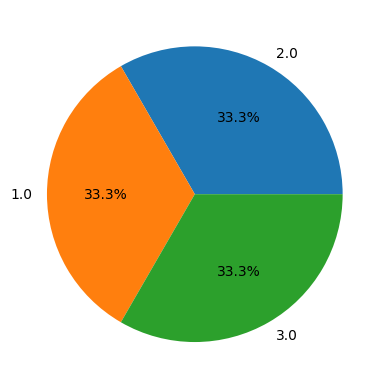

In [ ]:
plt.pie(x = datos_re['fetal_health'].value_counts(), labels = datos_re['fetal_health'].value_counts().index, autopct = '%0.1f%%') #Autopct es la cantidad de decimales
plt.show()

Pipelines para transformación de datos

In [ ]:
#Separación de variables por tipo
numCols = datos_re.select_dtypes(include = ['float64', 'int64']).columns.to_list()
catCols = datos_re.drop('fetal_health', axis = 1).select_dtypes(include = ['object']).columns.to_list()
yCols = datos_re[['fetal_health']].columns.to_list()

#Crear los transformadores de variables
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
yTransformer = Pipeline(steps = [('ordinal', OrdinalEncoder())])

#Diseñar el transformador de columnas
preprocesador = ColumnTransformer(transformers = [
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols),
    ('ord', yTransformer, yCols)
], remainder = 'passthrough')
set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['baseline value', 'accelerations',
                                  'uterine_contractions', 'light_decelerations',
                                  'prolongued_decelerations',
                                  'abnormal_short_term_variability',
                                  'mean_value_of_short_term_variability',
                                  'percentage_of_time_with_abnormal_long_term_variability',
                                  'mean_va...
                                  'histogram_width', 'histogram_min',
                                  'histogram_max', 'histogram_number_of_peaks',
                                  'histogram_number_of_zeroes',
                                  'histogram_mode', 'histogram_mean',
                                  'histogram_median', 'histogram_variance']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['histogram_tendency']),
                                ('ord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['fetal_health'])])

In [ ]:
datosPre = preprocesador.fit_transform(datos_re)
codCat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCols, codCat, yCols])
datosPro = pd.DataFrame(datosPre, columns = labels)
datosPro.head()

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency_-1.0,histogram_tendency_0.0,histogram_tendency_1.0,fetal_health
0,0.481481,0.315789,0.400000,0.2,0.0,0.066667,0.279412,0.0,0.205128,0.717514,...,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.0,1.0,0.0,0.0
1,0.500000,0.157895,0.533333,0.2,0.0,0.053333,0.279412,0.0,0.264300,0.717514,...,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.0,1.0,0.0,0.0
2,0.518519,0.157895,0.533333,0.2,0.0,0.053333,0.323529,0.0,0.453649,0.644068,...,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,0.0,0.0,1.0,0.0
3,0.481481,0.368421,0.533333,0.0,0.0,0.053333,0.323529,0.0,0.392505,0.644068,...,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,0.0,0.0,1.0,0.0
4,0.462963,0.263158,0.533333,0.2,0.0,0.213333,0.176471,0.0,0.254438,0.355932,...,0.277778,0.0,0.590551,0.559633,0.550459,0.026022,0.0,0.0,1.0,0.0


In [ ]:
#Separación de X - Y
X = datosPro.drop('fetal_health', axis = 1)
y = datosPro[['fetal_health']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.9) #Entre mas datos de prueba soy mas laxo, entre menos mas acido.
#90 para entrenamiento, 10 para prueba

## Modelado + Evaluación

### Regresión logística

In [ ]:
modelo_1 = LogisticRegression(solver = 'saga')
modelo_1.fit(x_train, y_train)

LogisticRegression(solver='saga')

In [ ]:
hiper_grid = {'penalty':['l1', 'l2', 'elasticnet', 'None'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 50, 35, 100]}
              # 11 C * 4 penalty = Va a evaluar los hiperparametros en 44 modelos

In [ ]:
#Busqueda exhaustiva
classifier_e = GridSearchCV(estimator = modelo_1,
                          param_grid = hiper_grid,
                          cv = 5)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 50, 35,
                               100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None']})

In [ ]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']),
                        pd.DataFrame(classifier_e.cv_results_['mean_test_score'],
                        columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,C,penalty,Accuracy
17,1.0000,l2,0.861236
16,1.0000,l1,0.858996
33,50.0000,l2,0.858325
37,35.0000,l2,0.858101
25,15.0000,l2,0.857653
29,20.0000,l2,0.857653
20,10.0000,l1,0.857653
21,10.0000,l2,0.857430
24,15.0000,l1,0.857205
28,20.0000,l1,0.857205


Los mejores parámetros generados fueron una C de 1 con una penalty de l2, con un accuracy del 86.12%

In [ ]:
modelo_1_final = classifier_e.best_estimator_
modelo_1_final

LogisticRegression(C=1, solver='saga')

In [ ]:
y_pred_test_final_1 = modelo_1_final.predict(x_test)
accuracy_test_1_final = accuracy_score(y_test, y_pred_test_final_1)
matrix_test_1_final = confusion_matrix(y_test, y_pred_test_final_1)
f1_test_1_final = f1_score(y_test, y_pred_test_final_1, average='macro')
#Utilizamos average = macro para una métrica de evaluación que tenga en cuenta todas las clases y trate cada una de manera equitativa.
#También se puede usar average = None para ver el f1 score de cada clase predicha por separado.

Accuracy de la busqueda para Regresión Logística es: 0.8531187122736419
F1 Score de la busqueda para Regresión Logística es: 0.8563391045692249


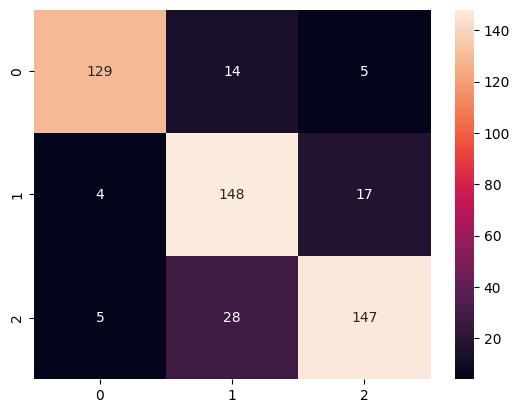

In [ ]:
print(f'Accuracy de la busqueda para Regresión Logística es: {accuracy_test_1_final}')
print(f'F1 Score de la busqueda para Regresión Logística es: {f1_test_1_final}')
sb.heatmap(matrix_test_1_final, annot= True, fmt = 'd')
plt.show()

En este caso vemos un desempeño del 85%, y un buen valor F1, por lo que se determina que este modelo es utilizable, pues cumple con las condiciones del cliente.

### Máquina de soporte vectorial

In [ ]:
modelo_2 = SVC()
hiper_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 25],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree' : [2,3,4,5]}

In [ ]:
classifier_e = GridSearchCV(estimator = modelo_2,
                            param_grid = hiper_grid,
                            cv = 3)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 25],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_['params']),
                        pd.DataFrame(classifier_e.cv_results_['mean_test_score'],
                        columns = ['Accuracy'])], axis = 1)
validation.sort_values('Accuracy', ascending = False)

,C,degree,kernel,Accuracy
141,25.0000,5,poly,0.965756
125,20.0000,5,poly,0.963965
109,15.0000,5,poly,0.963517
93,10.0000,5,poly,0.963070
121,20.0000,4,poly,0.962847
...,...,...,...,...
27,0.0010,4,sigmoid,0.337287
30,0.0010,5,rbf,0.337287
31,0.0010,5,sigmoid,0.337287
1,0.0001,2,poly,0.337287


Los mejores parámetros generados fueron una C de 25, un degree de 5 y un kernel poly, con un accuracy del 96.57%

In [ ]:
modelo_2_final = classifier_e.best_estimator_
modelo_2_final

SVC(C=25, degree=5, kernel='poly')

In [ ]:
y_pred_test_final_2 = modelo_2_final.predict(x_test)
accuracy_test_2_final = accuracy_score(y_test, y_pred_test_final_2)
matrix_test_2_final = confusion_matrix(y_test, y_pred_test_final_2)
f1_test_2_final = f1_score(y_test, y_pred_test_final_2, average='macro')

Accuracy de la busqueda para SVM es: 0.9778672032193159
F1 Score de la busqueda para SVM es: 0.9771319791442178


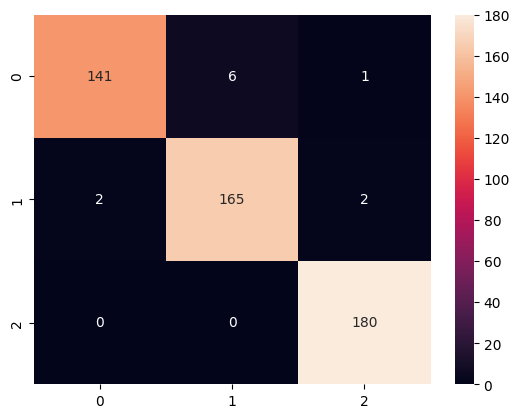

In [ ]:
print(f'Accuracy de la busqueda para SVM es: {accuracy_test_2_final}')
print(f'F1 Score de la busqueda para SVM es: {f1_test_2_final}')
sb.heatmap(matrix_test_2_final, annot= True, fmt = 'd')
plt.show()

En este caso vemos un desempeño del 97%, y un buen valor F1, por lo que se determina que este modelo es utilizable, pues cumple con las condiciones del cliente.

### K Vecinos más cercanos

In [ ]:
modelo_3 = KNeighborsClassifier()
hiper_grid = {'n_neighbors' : [3, 5, 7, 9, 11],
              'p' : [1, 2]}

In [ ]:
#Busqueda exhaustiva
classifier_e = GridSearchCV(estimator = modelo_3,
                            param_grid=hiper_grid,
                            cv=3)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [ ]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_["params"]),
                        pd.DataFrame(classifier_e.cv_results_["mean_test_score"],
                                     columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy",ascending=False)

,n_neighbors,p,Accuracy
1,3,2,0.960832
0,3,1,0.959265
3,5,2,0.946957
2,5,1,0.944270
5,7,2,0.923904
4,7,1,0.923678
7,9,2,0.914949
6,9,1,0.914277
9,11,2,0.904654
8,11,1,0.903759


Los mejores parámetros generados fueron 3 vecinos, y una P de 2, con un accuracy del 96%

In [ ]:
modelo_3_final = classifier_e.best_estimator_
modelo_3_final

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_test_final_3 = modelo_3_final.predict(x_test)
accuracy_test_3_final = accuracy_score(y_test, y_pred_test_final_3)
matrix_test_3_final = confusion_matrix(y_test, y_pred_test_final_3)
f1_test_3_final = f1_score(y_test, y_pred_test_final_3, average='macro')

Accuracy de la búsqueda para K vecinos más cercanos es: 0.9818913480885312
F1 score de la búsqueda para K vecinos más cercanos es: 0.9809165481989495


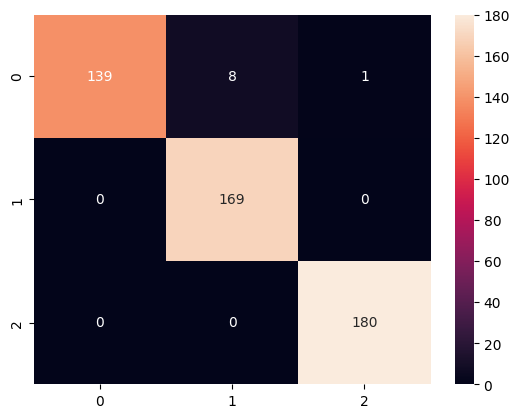

In [ ]:
print(f'Accuracy de la búsqueda para K vecinos más cercanos es: {accuracy_test_3_final}')
print(f'F1 score de la búsqueda para K vecinos más cercanos es: {f1_test_3_final}')
sb.heatmap(matrix_test_3_final, annot = True, fmt = 'd')
plt.show()

En este caso vemos un desempeño del 98%, y un buen valor F1, por lo que se determina que este modelo es utilizable, pues cumple con las condiciones del cliente.

### Árbol de Decisión

In [ ]:
modelo_4 = DecisionTreeClassifier()
hiper_grid = {'criterion' : ['log_loss', 'gini', 'entropy'],
              'max_depth' : [5,15,20,25,30],
              'min_samples_split' : [2, 3, 4, 5],
              'max_leaf_nodes' : [None, 10, 12, 15]}

In [ ]:
#Busqueda exhaustiva
classifier_e = GridSearchCV(estimator = modelo_4,
                            param_grid=hiper_grid,
                            cv=3)
classifier_e.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [5, 15, 20, 25, 30],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5]})

In [ ]:
validation = pd.concat([pd.DataFrame(classifier_e.cv_results_["params"]),
                        pd.DataFrame(classifier_e.cv_results_["mean_test_score"],
                                     columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy",ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,Accuracy
64,log_loss,30,NaN,2,0.979632
33,log_loss,20,NaN,3,0.979408
193,entropy,20,NaN,3,0.979408
176,entropy,15,NaN,2,0.978961
192,entropy,20,NaN,2,0.978961
...,...,...,...,...,...
7,log_loss,5,10.0,5,0.887647
6,log_loss,5,10.0,4,0.887647
5,log_loss,5,10.0,3,0.887647
4,log_loss,5,10.0,2,0.887647


Los mejores parámetros generados fueron un criterion log_loss, un max_depth de 30,  un min_samples_split de 2, con un accuracy del 97.96%

In [ ]:
modelo_4_final = classifier_e.best_estimator_
modelo_4_final

DecisionTreeClassifier(criterion='log_loss', max_depth=30)

In [ ]:
y_pred_test_final_4 = modelo_4_final.predict(x_test)
accuracy_test_4_final = accuracy_score(y_test, y_pred_test_final_4)
matrix_test_4_final = confusion_matrix(y_test, y_pred_test_final_4)
f1_test_4_final = f1_score(y_test, y_pred_test_final_4, average='macro')

Accuracy de la búsqueda para Árbol de decisión es: 0.9919517102615694
F1 score de la búsqueda para Árbol de decisión es: 0.9915778776005254


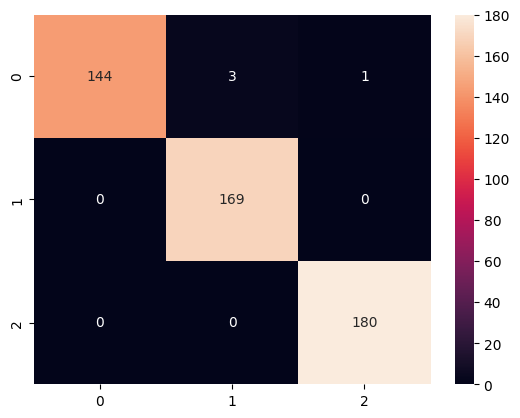

In [ ]:
print(f'Accuracy de la búsqueda para Árbol de decisión es: {accuracy_test_4_final}')
print(f'F1 score de la búsqueda para Árbol de decisión es: {f1_test_4_final}')
sb.heatmap(matrix_test_4_final, annot = True, fmt = 'd')
plt.show()

En este caso vemos un desempeño del 99%, y un muy buen valor F1, por lo que se determina que este modelo es utilizable, pues cumple con las condiciones del cliente.

### Bosque Aleatorio

In [ ]:
modelo_5 = RandomForestClassifier(random_state = 15)
hiper_grid = {'n_estimators' : [100, 200, 300, 400, 500],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_depth' : [5, 15, 20, 25, 30, 35],
              'min_samples_split' : [2,3,4,5],
              'max_leaf_nodes': [None, 10, 23, 15]}

In [ ]:
#Usamos búsqueda aleatorizada porque el modelo se tarda mucho en realizar una busqueda exhaustiva con nuestro hipergrid
classifier_a = RandomizedSearchCV(estimator = modelo_5,
                                  param_distributions = hiper_grid,
                                  n_iter = 10, cv= 5)
classifier_a.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 15, 20, 25, 30, 35],
                                        'max_leaf_nodes': [None, 10, 23, 15],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
validation = pd.concat([pd.DataFrame(classifier_a.cv_results_["params"]),
                        pd.DataFrame(classifier_a.cv_results_["mean_test_score"],
                                     columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy",ascending=False)

,n_estimators,min_samples_split,max_leaf_nodes,max_depth,criterion,Accuracy
9,400,2,NaN,30,entropy,0.986794
4,300,3,NaN,15,entropy,0.986347
0,300,4,NaN,25,entropy,0.986123
2,400,4,NaN,30,log_loss,0.986123
5,300,5,NaN,30,gini,0.986123
3,400,5,NaN,30,gini,0.985899
7,400,3,NaN,35,gini,0.985451
6,300,5,NaN,15,gini,0.985228
8,300,4,15.0,15,log_loss,0.927485
1,500,4,15.0,15,gini,0.924127


Los mejores parámetros generados fueron n_estimators de 400, min_samples_split de 2, max_depth de 30 y un criterion entropy, con un accuracy del 98%

In [ ]:
modelo_5_final = classifier_a.best_estimator_
modelo_5_final

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=400,
                       random_state=15)

In [ ]:
y_pred_test_final_5 = modelo_5_final.predict(x_test)
accuracy_test_5_final = accuracy_score(y_test, y_pred_test_final_5)
matrix_test_5_final = confusion_matrix(y_test, y_pred_test_final_5)
f1_test_5_final = f1_score(y_test, y_pred_test_final_5, average='macro')

Accuracy de la búsqueda para Random Forest es: 0.993963782696177
F1 score de la búsqueda para Random Forest es: 0.9936544793970755


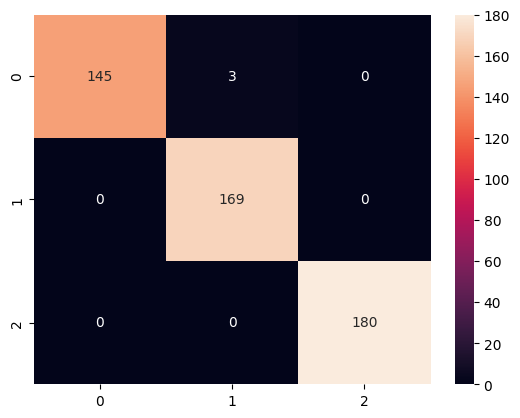

In [ ]:
print(f'Accuracy de la búsqueda para Random Forest es: {accuracy_test_5_final}')
print(f'F1 score de la búsqueda para Random Forest es: {f1_test_5_final}')
sb.heatmap(matrix_test_5_final, annot = True, fmt = 'd')
plt.show()

En este caso vemos un desempeño del 99%, y un buen valor F1, por lo que se determina que este modelo es utilizable, pues cumple con las condiciones del cliente.

# Etapa de cierre

Con base en los resultados obtenidos en la evaluación de diversos modelos de clasificación para el conjunto de datos proporcionado, se determina que el modelo Random Forest sobresale como la elección óptima. Este modelo ha demostrado un rendimiento excepcional con un accuracy del 99.39% y un F1 Score del 99.36%. Estos valores reflejan la capacidad del modelo para realizar predicciones precisas y confiables.

Dado que el cliente estableció requisitos rigurosos que incluían un alto nivel de precisión (accuracy) y un F1 Score superior al 85%, el modelo Random Forest no solo cumple con estas condiciones, sino que las supera significativamente. Esto confirma su calidad y confiabilidad en la tarea de clasificación de interés.  La decisión final es implementar el modelo Random Forest en la aplicación de este conjunto de datos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=972fa8da-124a-42de-9628-53280b7239eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>